# TESTING NEW DATASET

# Part 1 - Model Insights

# Code

In [10]:
## Adding folder above notebookt to path (for importing from CODE)
import os, sys
# sys.path.append(os.path.abspath('../'))

## Automatically reload changed functions
%load_ext autoreload
%autoreload 2

# Custom Code used in lessons
import CODE
import CODE.lp_functions as lp

# Importing standard packages and viz styles
from CODE.standard_imports import *

# Function lp.show_code to see source code
lp.show_code(CODE.standard_imports)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


```python
"""
Standard Imports module: lazy importing of essential packages

Example Use:
>> from CODE.standard_imports import *
"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

```

In [11]:
lp.show_code(CODE.lp_styles)
from CODE.lp_styles import *
# plt.rcParams['figure.figsize'] = (12, 8)

```python
import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

```

In [12]:
# Function for Showing Source Code in Markdown with Python Syntax
lp.show_code(lp.show_code)

```python
def show_code(function):
    """Display the source code of a funciton or module.
    Uses the inspect and IPython modules to display Markdown with Python Syntax. 
    Args:
        function (function or module object): Pass the function/module to show. 
                                              Use function name, no parentheses.
        
    Example Use:
    ## Example with Function
    >> import CODE.lp_functions as lp
    >> import scipy.stats as stats
    >> lp.show_code(stats.ttest_ind)  
    """
    
    import inspect 
    from IPython.display import display,Markdown
    
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))

```

In [13]:
## Preprocessing Imports ([ ] TO DO: Consider making preprocess_imports module)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import (make_column_transformer, make_column_selector, 
                             ColumnTransformer)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.base import clone

##import statsmodels correctly
import statsmodels.api as sm
from scipy import stats


## fixing random for lesson generation
np.random.seed(321)


In [14]:
## Load in data
FILE = "Data/AmesHousing.csv"#"https://docs.google.com/spreadsheets/d/e/2PACX-1vSEZQEzxja7Hmj5tr5nc52QqBvFQdCAGb52e1FRK1PDT2_TQrS6rY_TR9tjZjKaMbCy1m5217sVmI5q/pub?output=csv"


df = pd.read_csv(FILE)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [15]:
df = df.drop(columns=['Order'])

In [16]:
# # Date feature engineering 
# df['datetime'] = pd.to_datetime(df['date'])

# # df['Month'] =  df['datetime'].dt.month_name() 
# df['Month'] = df['datetime'].dt.month_name()
# df['Year'] = df['datetime'].dt.year

df = df.set_index('PID')
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 526301100 to 924151050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  O

In [19]:
df.select_dtypes("O").nunique()

MS Zoning          7
Street             2
Alley              2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          8
Exterior 1st      16
Exterior 2nd      17
Mas Vnr Type       5
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       5
Functional         8
Fireplace Qu       5
Garage Type        6
Garage Finish      3
Garage Qual        5
Garage Cond        5
Paved Drive        3
Pool QC            4
Fence              4
Misc Feature       5
Sale Type         10
Sale Condition     6
dtype: int64

In [ ]:
# ## Convert all categories to strings
# CONVERT_TO_STR_COLS = ['zipcode']
# df[CONVERT_TO_STR_COLS] = df[CONVERT_TO_STR_COLS].astype(str)

In [20]:
# CONVERT_TO_NUM_COLS = []
# for col in CONVERT_TO_NUM_COLS:
#     df[col] = pd.to_numeric(df[col])

In [21]:
## Drop unwanted columns
DROP_COLS = []#,'datetime','Year']
df_ml = df.drop(columns=DROP_COLS)
df_ml

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,

In [22]:
## final info before X/y
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 526301100 to 924151050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  O

In [23]:
df_ml.isna().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

### Removing Outliers (from target)

<AxesSubplot: xlabel='SalePrice'>

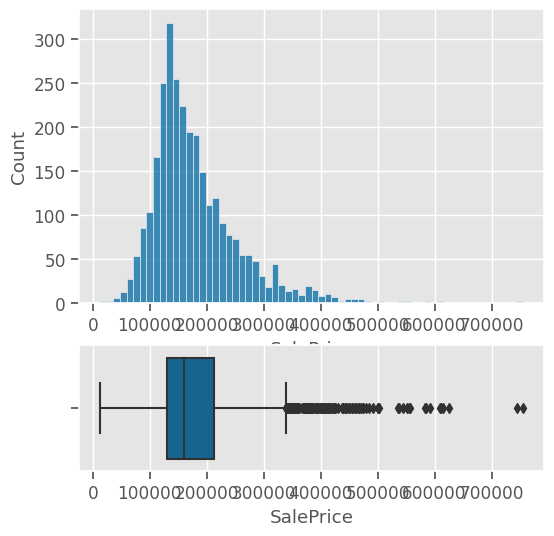

In [30]:
grid_spec = {'height_ratios':[0.7,0.3]}
fig, axes = plt.subplots(nrows=2, figsize=(6,6), gridspec_kw=grid_spec)

sns.histplot(data=df_ml, x='SalePrice',ax=axes[0])
sns.boxplot(data=df_ml, x='SalePrice',ax=axes[1])

In [26]:
# import scipy.stats as stats
# idx_outliers = np.abs(stats.zscore(df_ml['price']) )>3
# idx_outliers.sum()

In [27]:
# df_ml[~idx_outliers]

In [28]:
# df_ml = df_ml[~idx_outliers].copy()
# df_ml

In [29]:
# grid_spec = {'height_ratios':[0.7,0.3]}
# fig, axes = plt.subplots(nrows=2, figsize=(6,6),gridspec_kw=grid_spec)

# sns.histplot(data=df_ml, x='price',ax=axes[0])
# sns.boxplot(data=df_ml, x='price',ax=axes[1])

## Preprocessing with Scikit-Learn 1.1+

In [31]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


### Preprocessing + ColumnTransformer


In [32]:
## Make x and y variables
target = 'SalePrice'
drop_cols_model = []

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907201220,20,RL,NaN,16269,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1978,1978,Gable,CompShg,MetalSd,MetalSd,BrkFace,76.0,TA,TA,BrkTil,Gd,TA,Av,GLQ,625.0,Unf,0.0,282.0,907.0,GasA,TA,Y,SBrkr,907,0,0,907,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1978.0,Unf,1.0,343.0,TA,TA,Y,72,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal
528110080,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,436.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1400.0,Unf,0.0,310.0,1710.0,GasA,Ex,Y,SBrkr,1710,0,0,1710,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3.0,866.0,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,1,2008,New,Partial
531478010,20,RH,NaN,8900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,4,4,1966,1966,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1056.0,Unf,0.0,0.0,1056.0,GasA,TA,Y,SBrkr,1056,0,0,1056,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1966.0,Unf,1.0,384.0,TA,TA,Y,0,42,0,0,0,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal
527356060,60,RL,85.0,11475,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,6,6,1975,1975,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,550.0,Unf,0.0,163.0,713.0,GasA,TA,Y,SBrkr,811,741,0,1552,1.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1975.0,RFn,2.0,434.0,TA,TA,Y,209,208,0,0,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal
528118040,60,RL,118.0,13654,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Gable,CompShg,MetalSd,MetalSd,BrkFace,365.0,Gd,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1704.0,1704.0,GasA,Ex,Y,SBrkr,1722,1036,0,2758,0.0,0.0,2,1,4,1,Ex,9,Typ,1,Ex,BuiltIn,2005.0,Fin,3.0,814.0,TA,TA,Y,282,55,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [33]:
## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore',
                                       sparse=False) )
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [34]:
## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

>- Note: So far, all of the code should be familiar to you. 
    -  With sklearn v1.1+, you should always add `verbose_feature_names_out=False` to column transformers *`ColumnTransformer`/ `make_column_transformer`)
        - (If you want to see what the verbose version looks like feel free to give it a try!)

In [35]:
## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13e9cafa0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13fd54100>)],
                  verbose_feature_names_out=False)

In [36]:
## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'MS Zoning_A (agr)',
       'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Grvl',
       'Street_Pave', 'Alley_Grvl', 'Alley_MISSING', 'Alley_Pave',
       'Lot Shape_IR1', 'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg',
       'Land Contour_Bnk', 'Land Contour_HLS', 'Land Contour_Low',
       'Land Contour_

In [37]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_MISSING,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,...,Garage Finish_Fin,Garage Finish_MISSING,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_MISSING,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_MISSING,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_MISSING,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MISSING,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_MISSING,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907201220,20.0,69.230685,16269.0,5.0,5.0,1978.0,1978.0,76.0,625.0,0.0,282.0,907.0,907.0,0.0,0.0,907.0,0.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,1978.0,1.0,343.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
528110080,20.0,107.000000,13891.0,8.0,5.0,2007.0,2008.0,436.0,1400.0,0.0,310.0,1710.0,1710.0,0.0,0.0,1710.0,1.0,0.0,2.0,0.0,2.0,1.0,6.0,1.0,2007.0,3.0,866.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
531478010,20.0,69.230685,8900.0,4.0,4.0,1966.0,1966.0,0.0,1056.0,0.0,0.0,1056.0,1056.0,0.0,0.0,1056.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1966.0,1.0,384.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,11.0,2006.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
527356060,60.0,85.000000,11475.0,6.0,6.0,1975.0,1975.0,0.0,550.0,0.0,163.0,713.0,811.0,741.0,0.0,1552.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1975.0,2.0,434.0,209.0,208.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
528118040,60.0,118.000000,13654.0,9.0,5.0,2005.0,2006.0,365.0,0.0,0.0,1704.0,1704.0,1722.0,1036.0,0.0,2758.0,0.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2005.0,3.0,814.0,282.0,55.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [38]:
## Customization Options
pd.set_option("display.max_columns",100)
X_train_df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_MISSING,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,...,Garage Finish_Fin,Garage Finish_MISSING,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_MISSING,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_MISSING,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_MISSING,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MISSING,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_MISSING,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907201220,20.0,69.230685,16269.0,5.0,5.0,1978.0,1978.0,76.0,625.0,0.0,282.0,907.0,907.0,0.0,0.0,907.0,0.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,1978.0,1.0,343.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
528110080,20.0,107.000000,13891.0,8.0,5.0,2007.0,2008.0,436.0,1400.0,0.0,310.0,1710.0,1710.0,0.0,0.0,1710.0,1.0,0.0,2.0,0.0,2.0,1.0,6.0,1.0,2007.0,3.0,866.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
531478010,20.0,69.230685,8900.0,4.0,4.0,1966.0,1966.0,0.0,1056.0,0.0,0.0,1056.0,1056.0,0.0,0.0,1056.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1966.0,1.0,384.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,11.0,2006.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
527356060,60.0,85.000000,11475.0,6.0,6.0,1975.0,1975.0,0.0,550.0,0.0,163.0,713.0,811.0,741.0,0.0,1552.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1975.0,2.0,434.0,209.0,208.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
528118040,60.0,118.000000,13654.0,9.0,5.0,2005.0,2006.0,365.0,0.0,0.0,1704.0,1704.0,1722.0,1036.0,0.0,2758.0,0.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2005.0,3.0,814.0,282.0,55.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [39]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}")


### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, 
                    X_test_df, y_test)

Training Data:	R^2 = 0.95	RMSE = 18,768.56
Test Data:	R^2 = 0.85	RMSE = 28,523.06


In [41]:
reg.coef_

array([-4.09391215e+01,  8.56308070e+01,  5.51184329e-01,  6.09814797e+03,
        5.95162712e+03,  3.40505678e+02,  6.71499488e+01,  2.64184012e+01,
        1.69267124e+01,  1.16284315e+01, -3.17477371e+00,  2.53801900e+01,
        1.62508665e+01,  3.23193353e+01, -1.01140074e+01,  3.84556650e+01,
        1.51717793e+03, -1.71924544e+03,  2.81448201e+03,  1.35225768e+03,
       -4.37587625e+03, -1.33159311e+04,  4.98990399e+02,  8.24309384e+03,
        5.00264134e+01,  3.52001481e+03,  1.49713912e+01,  7.30346751e+00,
        3.41577021e+00,  1.18941925e+00, -1.53081429e+00,  4.29005449e+01,
        1.13428637e+01,  1.23706504e-01, -2.09318427e+02, -4.41258630e+02,
       -8.10551227e+03, -9.89099418e+03,  4.95733049e+03,  5.26087847e+03,
        9.56839540e+03,  2.82435390e+03, -4.61445180e+03, -9.48567330e+03,
        9.48567330e+03,  1.69330266e+03, -3.26361694e+00, -1.69003904e+03,
       -2.25758520e+03,  1.14170404e+03,  2.60707058e+03, -1.49118941e+03,
        1.35564188e+03,  

In [42]:
reg.intercept_

-274523.2956507623

In [43]:
## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
coeffs

MS SubClass                  -40.939121
Lot Frontage                  85.630807
Lot Area                       0.551184
Overall Qual                6098.147974
Overall Cond                5951.627119
                              ...      
Sale Condition_Alloca       5915.410927
Sale Condition_Family       -356.933623
Sale Condition_Normal       2306.585927
Sale Condition_Partial    -11888.757901
Intercept                -274523.295651
Length: 319, dtype: float64

In [47]:
## formatting numbers to not use , thousands sep, and 4 digits floats
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', None)

In [48]:
coeffs

MS SubClass                   -40.9391
Lot Frontage                   85.6308
Lot Area                        0.5512
Overall Qual                6,098.1480
Overall Cond                5,951.6271
Year Built                    340.5057
Year Remod/Add                 67.1499
Mas Vnr Area                   26.4184
BsmtFin SF 1                   16.9267
BsmtFin SF 2                   11.6284
Bsmt Unf SF                    -3.1748
Total Bsmt SF                  25.3802
1st Flr SF                     16.2509
2nd Flr SF                     32.3193
Low Qual Fin SF               -10.1140
Gr Liv Area                    38.4557
Bsmt Full Bath              1,517.1779
Bsmt Half Bath             -1,719.2454
Full Bath                   2,814.4820
Half Bath                   1,352.2577
Bedroom AbvGr              -4,375.8762
Kitchen AbvGr             -13,315.9311
TotRms AbvGrd                 498.9904
Fireplaces                  8,243.0938
Garage Yr Blt                  50.0264
Garage Cars              

In [58]:
df_ml.select_dtypes('object').nunique()

MS Zoning          7
Street             2
Alley              2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          8
Exterior 1st      16
Exterior 2nd      17
Mas Vnr Type       5
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       5
Functional         8
Fireplace Qu       5
Garage Type        6
Garage Finish      3
Garage Qual        5
Garage Cond        5
Paved Drive        3
Pool QC            4
Fence              4
Misc Feature       5
Sale Type         10
Sale Condition     6
dtype: int64

In [54]:
# # with sns.plotting_context('notebook'):
# ax = coeffs.sort_values().plot(kind='barh',figsize=(8,30))
# ax.axvline(0,color='k', lw=1)

In [55]:
# ax = coeffs.sort_values().plot(kind='barh',figsize=(8,20))
# ax.axvline(0,color='k', lw=1)

In [56]:
# coeffs

### Multicollinearity & One Hot Encoding

In [ ]:
pd.options.display.max_rows

## DROP COLS


### ADMIN: DECIDING AMES TO DROP

In [59]:
drop_cols = [c for c in df.columns if 'BsmtFin' in c]
drop_cols.extend([c for c in df.columns if "Exterior" in c])
drop_cols.extend([c for c in df.columns if "Neighborhood" in c])
drop_cols

['BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Exterior 1st',
 'Exterior 2nd',
 'Neighborhood']

In [64]:
## Make x and y variables
target = 'SalePrice'
# drop_cols_model = [

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore',#drop='first',
                                       sparse=False,
#                                        max_categories=15
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='mean'), 
#                          StandardScaler() 
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_MISSING,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Garage Finish_Fin,Garage Finish_MISSING,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_MISSING,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_MISSING,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_MISSING,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MISSING,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_MISSING,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907201220,20.0000,69.2307,"16,269.0000",5.0000,5.0000,"1,978.0000","1,978.0000",76.0000,282.0000,907.0000,907.0000,0.0000,0.0000,907.0000,0.0000,0.0000,1.0000,0.0000,3.0000,1.0000,5.0000,0.0000,"1,978.0000",1.0000,343.0000,72.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,"2,009.0000",0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
528110080,20.0000,107.0000,"13,891.0000",8.0000,5.0000,"2,007.0000","2,008.0000",436.0000,310.0000,"1,710.0000","1,710.0000",0.0000,0.0000,"1,710.0000",1.0000,0.0000,2.0000,0.0000,2.0000,1.0000,6.0000,1.0000,"2,007.0000",3.0000,866.0000,0.0000,102.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,"2,008.0000",0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
531478010,20.0000,69.2307,"8,900.0000",4.0000,4.0000,"1,966.0000","1,966.0000",0.0000,0.0000,"1,056.0000","1,056.0000",0.0000,0.0000,"1,056.0000",1.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,"1,966.0000",1.0000,384.0000,0.0000,42.0000,0.0000,0.0000,0.0000,0.0000,0.0000,11.0000,"2,006.0000",0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
527356060,60.0000,85.0000,"11,475.0000",6.0000,6.0000,"1,975.0000","1,975.0000",0.0000,163.0000,713.0000,811.0000,741.0000,0.0000,"1,552.0000",1.

In [65]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, 
                    X_test_df, y_test)

Training Data:	R^2 = 0.94	RMSE = 20,633.93
Test Data:	R^2 = 0.83	RMSE = 30,633.70


In [66]:
# reg = LinearRegression()
# reg.fit(X_train_df,y_train)
# evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

In [67]:
# ## Saving the coefficients
# coeffs = pd.Series(reg.coef_, index= feature_names)
# coeffs.loc['Intercept'] = reg.intercept_
# coeffs

In [68]:
def get_coeffs(reg):
    ## Saving the coefficients
    coeffs = pd.Series(reg.coef_, index= reg.feature_names_in_)
    coeffs.loc['Intercept'] = reg.intercept_
    return coeffs

In [69]:
# ## Saving the coefficients
# coeffs = pd.Series(reg.coef_, index= feature_names)
# coeffs.sort_values()
coeffs = get_coeffs(reg)
coeffs

MS SubClass                    33.6943
Lot Frontage                   96.4684
Lot Area                        0.5579
Overall Qual                8,097.3723
Overall Cond                6,137.8661
Year Built                    336.7252
Year Remod/Add                 67.2621
Mas Vnr Area                   36.6610
Bsmt Unf SF                   -17.8904
Total Bsmt SF                  43.6747
1st Flr SF                     17.2568
2nd Flr SF                     37.1879
Low Qual Fin SF               -13.7525
Gr Liv Area                    40.6923
Bsmt Full Bath              1,557.3569
Bsmt Half Bath             -3,432.0159
Full Bath                     675.2871
Half Bath                     591.8251
Bedroom AbvGr              -5,232.4763
Kitchen AbvGr             -18,897.5211
TotRms AbvGrd                 622.7923
Fireplaces                  7,442.1728
Garage Yr Blt                  29.7136
Garage Cars                 2,781.6991
Garage Area                    20.9081
Wood Deck SF             

In [70]:
def plot_coeffs(coeffs, figsize=(6,5), intercept=True,
                intercept_name="Intercept", sort_values=True,
                ascending=True, ax=None):
    
    ## Make function get coeffs if coeffs in not series
    if isinstance(coeffs, pd.Series) == False:
        coeffs = get_coeffs(coeffs)
        
    if (intercept==False):
        if intercept_name in coeffs:
            coeffs_plot = coeffs.drop(intercept_name).copy()
        else: 
            raise Exception(f"{intercept_name} not found.")
    else:
        coeffs_plot=coeffs.copy()
    
    if sort_values:
        coeffs_plot = coeffs_plot.sort_values(ascending=ascending)
        
    
    ax = coeffs_plot.plot(kind='barh',figsize=figsize,ax=ax)
    ax.axvline(0,color='k', lw=1)
    
#     plt.tight_layout()
    return ax

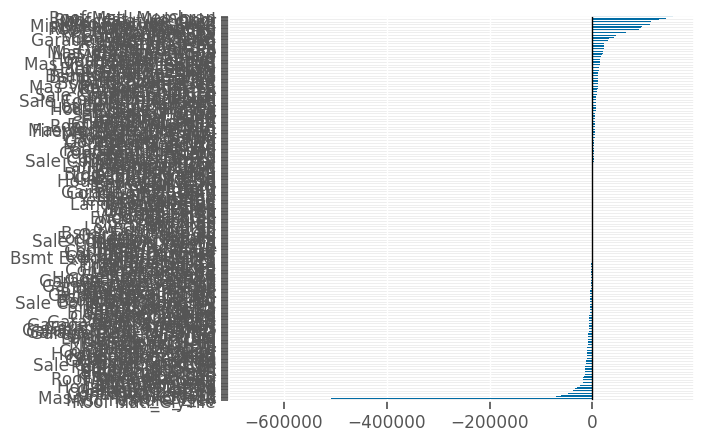

In [71]:
ax = plot_coeffs(reg)

### Tick Formatting

In [ ]:
from matplotlib import ticker

ax = plot_coeffs(coeffs)

price_fmt = ticker.StrMethodFormatter("${x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)

In [ ]:
## Make a "hundred_thousands" function 
def hundred_thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,.0f}k"

price_fmt_thous = ticker.FuncFormatter(hundred_thousands)

In [ ]:
ax = plot_coeffs(coeffs)
ax.xaxis.set_major_formatter(price_fmt_thous)

## Effect of Scaling on Coefficients

In [ ]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','lat','long','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
                         StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

In [ ]:
reg = LinearRegression()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

In [ ]:
plot_coeffs(reg)

In [ ]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode']#,'Month','lat','long','Year','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

In [ ]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

## Saving the coefficients
coeffs = pd.Series(reg.coef_, index= feature_names)
coeffs.loc['Intercept'] = reg.intercept_
# ax = coeffs.sort_values().plot(kind='barh')#,figsize=(6,4))
# ax.axvline(0,color='k', lw=1)
coeffs

In [ ]:
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,4))
ax.axvline(0,color='k', lw=1)

# APPENDIX: FOR SLIDES

In [ ]:
## Make x and y variables
target = 'price'
drop_cols_model = ['zipcode','lat','long','view']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

## Fewer Cols to Match Example Slides

### Raw

In [ ]:
slide_reg_cols = ['bathrooms','bedrooms','sqft_living','yr_built','waterfront']
## Make x and y variables
target = 'price'
# drop_cols_model = ['zipcode','lat','long','view']

y = df_ml[target].copy()
X = df_ml[slide_reg_cols].copy()#.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')


num_pipe_raw = make_pipeline( SimpleImputer(strategy='median'))


## make the preprocessing column transformer
preprocessor_raw = make_column_transformer( (num_pipe_raw, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)


## Get feature names
preprocessor_raw.fit(X_train)
feature_names_raw = preprocessor_raw.get_feature_names_out()




### PREP ALL X VARS
## Prepare X_train_df
X_train_raw = pd.DataFrame( preprocessor_raw.transform(X_train), 
                          columns = feature_names_raw,
                         index = X_train.index)

## Prepare X_test_df
X_test_raw = pd.DataFrame( preprocessor_raw.transform(X_test),
                          columns = feature_names_raw,
                         index=X_test.index)
X_train_raw

In [ ]:
reg_raw = LinearRegression(fit_intercept=True)
reg_raw.fit(X_train_raw,y_train)
evaluate_regression(reg_raw, X_train_raw, y_train, X_test_raw, y_test)

ax = plot_coeffs(reg_raw, intercept=False)
ax.xaxis.set_major_formatter(price_fmt_thous)

### Scaled

In [ ]:
num_pipe_scale = make_pipeline( SimpleImputer(strategy='mean'),  
                         StandardScaler()
                        )
preprocessor_scale = make_column_transformer( (num_pipe_scale, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)

preprocessor_scale.fit(X_train)
feature_names_scale = preprocessor_scale.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_scale = pd.DataFrame( preprocessor_scale.transform(X_train), 
                          columns = feature_names_scale,
                         index = X_train.index)

## Prepare X_test_df
X_test_scale = pd.DataFrame( preprocessor_scale.transform(X_test),
                          columns = feature_names_scale,
                         index=X_test.index)
X_train_scale

In [ ]:
reg_scale = LinearRegression(fit_intercept=True)
reg_scale.fit(X_train_scale,y_train)
evaluate_regression(reg_scale, X_train_scale, y_train, X_test_scale, y_test)

ax = plot_coeffs(reg_scale,intercept=False)
ax.xaxis.set_major_formatter(price_fmt_thous)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))

plot_coeffs(reg_raw, intercept=False,sort_values=False, ax=axes[0])
axes[0].set_title('Raw')
plot_coeffs(reg_scale,intercept=False, sort_values=False,ax=axes[1])
axes[1].set_title('Scaled')
fig.tight_layout();

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,plot_tree

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(X_train_df,y_train)
evaluate_regression(reg_tree, X_train_df, y_train, 
                    X_test_df, y_test)

In [ ]:
reg_tree.get_depth()

In [ ]:
plot_tree?

In [ ]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(40,20))
    plot_tree(reg_tree,filled=True, rounded=True,feature_names=reg_tree.feature_names_in_,
             fontsize=15);
    plt.tight_layout()
    
    fig.savefig('Images/plot_tree_demo.png',dpi=300)

# MAIN NOTEBOOK CONTINUE'D

##  Pivot Classification

In [ ]:
THRESH = 1e6
df_ml['Expensive'] = df_ml['price'] > THRESH

grid_spec = {'width_ratios':[0.8,0.2]}
fig, axes = plt.subplots(ncols=2, gridspec_kw=grid_spec, figsize=(12,3),)

ax=axes[0]
sns.boxplot(data=df_ml,x='price',ax=ax)
ax.axvline(THRESH,color='red',ls='--',label=f"Threshold ${THRESH:,.2f}")
ax.legend()
# ax.get_figure().set_size_inches(10,4)


ax = axes[1]
ax = sns.countplot(data=df_ml, x='Expensive',ax=ax)

fig.tight_layout()

In [ ]:
def make_target_and_plot(df_ml, THRESH = 1e6):
    df_ml = df_ml.copy()
    df_ml['Expensive'] = df_ml['price'] > THRESH

    grid_spec = {'width_ratios':[0.8,0.2]}
    fig, axes = plt.subplots(ncols=2, gridspec_kw=grid_spec, figsize=(12,3),)

    ax=axes[0]
    sns.boxplot(data=df_ml,x='price',ax=ax)
    ax.axvline(THRESH,color='red',ls='--',label=f"Threshold ${THRESH:,.2f}")
    ax.legend()
    # ax.get_figure().set_size_inches(10,4)


    ax = axes[1]
    ax = sns.countplot(data=df_ml, x='Expensive',ax=ax)

    fig.tight_layout()
    
    return df_ml

In [ ]:
make_target_and_plot(df_ml, THRESH=500_000)

In [ ]:
## Make x and y variables
target = 'Expensive'
drop_cols_model = ['zipcode','Month','lat','long','view','price']

y = df_ml[target].copy()
X = df_ml.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)


## make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')

cat_pipe = make_pipeline( SimpleImputer(strategy='constant', 
                                        fill_value='MISSING'),
                         OneHotEncoder(drop='first',
                                       sparse=False,
#                                        max_categories=5
                                      ) )


## make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')

num_pipe = make_pipeline( SimpleImputer(strategy='median'),  
#                          StandardScaler()
                        )


## make the preprocessing column transformer
preprocessor = make_column_transformer( (num_pipe, num_sel),
                                        (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)



## Get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                          columns = feature_names,
                         index = X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                          columns = feature_names,
                         index=X_test.index)
X_train_df

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_df,y_train)

In [ ]:
lp.evaluate_classification_admin(clf, X_train_df, y_train, X_test_df, y_test)


# ax.axvline(0,color='k', lw=1)
# importances

In [ ]:
# Saving the coefficients
importances = pd.Series(clf.feature_importances_, index= clf.feature_names_in_)
# coeffs.loc['Intercept'] = reg.intercept_
ax = importances.sort_values().plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')

## Model Explainers - SHAP

In [ ]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [ ]:
X_shap = shap.sample(X_train_df,nsamples = 500)
y_shap = y_train.loc[X_shap.index]

In [ ]:
explainer = shap.Explainer(clf)
explainer

In [ ]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

In [ ]:
X_shap.shape

In [ ]:
shap_values.shape

In [ ]:
shap_values[0]

In [ ]:
shap_vals_expensive = shap_values[:,:,1]
shap_vals_expensive.shape

In [ ]:
shap.summary_plot(shap_vals_expensive,features= X_shap, plot_type='bar')

In [ ]:
shap.summary_plot(shap_vals_expensive,X_shap)

In [ ]:
# shap.dependence_plot("yr_built",shap_vals_expensive.values,features=X_shap)

## Part 2 - Time Series

In [ ]:
df_ml['Year Built'] = pd.to_datetime(df['yr_built'],format="%Y")
ts = df_ml.set_index("Year Built")['price'].sort_index()
ts.plot();

In [ ]:
ts_count = ts.resample('Y').count()
ts_count

In [ ]:
ts_count.plot(title ='# of Homes',figsize=(12,3),kind='bar')#style='.-', 

In [ ]:
ts_mean = ts.resample('Y').mean()
ts_mean.plot(style='o-',figsize=(12,3), title='Average Home Value');

In [ ]:
ts_median = ts.resample('Y').median()
ts_median.plot(style='o-',figsize=(12,3), title='Median Home Value');

### TS - Price when sold

In [ ]:
df['Date'] = pd.to_datetime(df['date'])
df_ts = df.set_index("Date").sort_index()
df_ts

In [ ]:
ts = df_ts.resample('D')['price'].mean()
ts.plot()

### how does this compare to typical home values?

In [ ]:
fpath = 'Data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
zillow = pd.read_csv(fpath)
zillow

In [ ]:
king_county = zillow[zillow['CountyName'] == 'King County']
king_county

In [ ]:
id_cols = king_county.columns[:9]
id_cols

In [ ]:
melted = pd.melt(king_county, id_vars=id_cols, 
                 value_name='Home Value', 
                      var_name="Month")
melted['Month'] = pd.to_datetime(melted['Month'])
melted = melted.set_index(['CountyName','Month'])
melted

In [ ]:
king_ts = melted.loc['King County'].resample('M').mean()["Home Value"]
king_ts

In [ ]:
df_ts

In [ ]:
plot_kws ={'style':'.-'}
ax = king_ts.loc[df_ts.index.min():df_ts.index.max()].plot(**plot_kws)

df_ts.resample('M').mean()['price'].plot(ax=ax, **plot_kws)
ax.legend()

In [ ]:
# king_ts = melted.groupby('CountyName', as_index=False).resample("M")['Home Value'].mean()#numeric_only=True)
# king_ts
# king_ts.plot();